<a href="https://colab.research.google.com/github/amitaucs/tensorflowexplore/blob/master/FeedFwdArtificialNw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries


In [0]:
!pip install tensorflow==2.0.0-alpha
import tensorflow as tf


In [2]:
print(tf.__version__)

2.0.0-alpha0


In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0
print("x_train shape:" , x_train.shape)

x_train shape: (60000, 28, 28)


In [6]:
#build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
#train the model
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2978 - accuracy: 0.9133 - val_loss: 0.1478 - val_accuracy: 0.9556
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1479 - accuracy: 0.9560 - val_loss: 0.0997 - val_accuracy: 0.9705
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1113 - accuracy: 0.9666 - val_loss: 0.0861 - val_accuracy: 0.9731
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0892 - accuracy: 0.9729 - val_loss: 0.0855 - val_accuracy: 0.9730
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0757 - accuracy: 0.9765 - val_loss: 0.0764 - val_accuracy: 0.9781
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0660 - accuracy: 0.9787 - val_loss: 0.0714 - val_accuracy: 0.9784
Epoch 7/10
60000/60000 [==============================] 

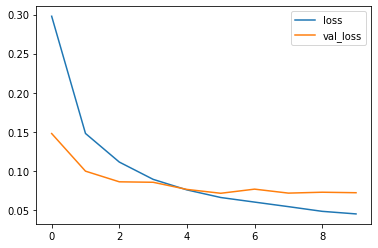

In [12]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.legend()


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

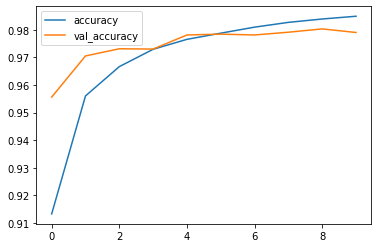

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label ='val_accuracy')
plt.legend()

In [18]:
#evaluate the model
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0721 - accuracy: 0.9790
[0.07213467748177355, 0.979]
